# TEST

ValueError: 'yerr' (shape: (50,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (82,))

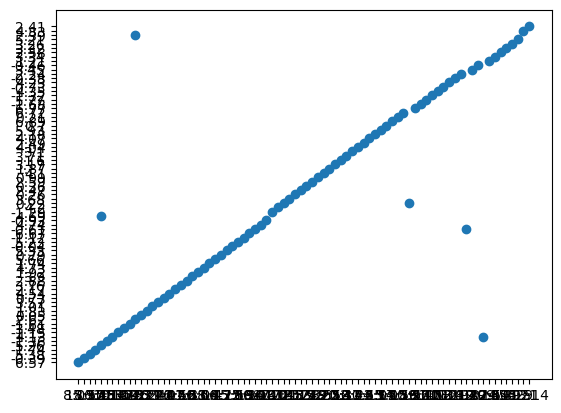

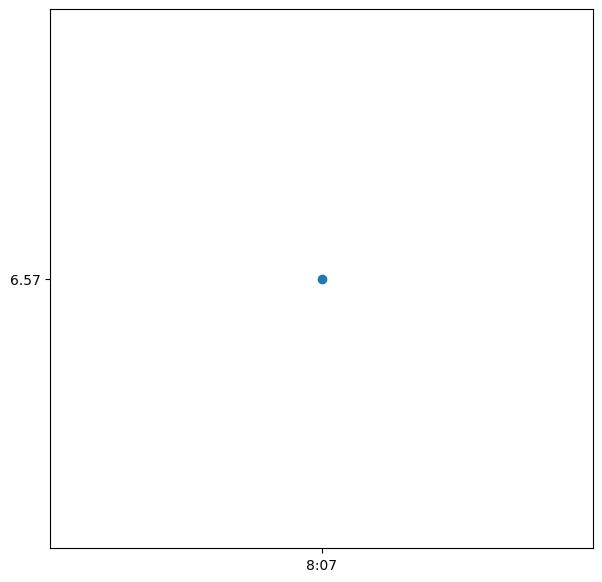

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

#define x and y
npoints = 50
x = np.linspace(0,2*np.pi,npoints)

with open('ASTR19_F23_group_project_data.txt') as f:
    lines = f.readlines()
    days = [line.split()[0] for line in lines]
    x = [line.split()[1] for line in lines]
    y = [line.split()[2] for line in lines]

days = ['1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', '10', '10', '11', '11', '12', '12', '13', '13', '14', '14', '15', '15', '16', '16', '17', '17', '18', '18', '19', '19', '20', '20', '21', '21', '22', '22', '23', '23', '24', '24', '25', '25', '26', '26', '27', '27', '28', '28', '29', '29', '30', '30', '31', '31', '32', '32', '33', '33', '34', '34', '35', '35', '36', '36', '37', '37', '38', '38', '39', '39', '40', '40', '41', '41']

x = ['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22', '5:21', '13:14']

y = ['6.57', '-0.39', '5.38', '-1.74', '5.26', '-1.36', '4.13', '-1.15', '3.48', '-1.61', '2.62', '0.05', '1.83', '1.01', '3.57', '0.73', '4.54', '2.17', '3.76', '2.88', '3.9', '1.92', '4.73', '1.74', '5.66', '0.79', '5.33', '-0.04', '5.23', '-1.12', '6.67', '-0.61', '4.74', '-0.93', '4.69', '-1.29', '4.2', '0.22', '3.68', '0.26', '2.47', '0.36', '2.59', '0.99', '4.1', '1.87', '3.17', '1.6', '3.71', '3.1', '4.04', '2.49', '4.07', '2.18', '5.93', '0.7', '6.89', '0.21', '6.72', '0.22', '6.77', '-1.68', '5.77', '-1.32', '4.35', '-0.73', '4.23', '-0.38', '2.24', '-0.61', '3.45', '-0.46', '4.13', '1.21', '3.34', '2.58', '3.32', '3.26', '5.21', '2.39', '4.83', '2.41']

a = 3.4
b = 2.1
c = 0.27
d = -1.3

#assuming this is where we check for the experimental error
sigma = 0.25
np.random.seed(120)

#create y and y error
#y = a * np.sin(b*x+c) + d + np.random.normal(scale=sigma,size=npoints)
#make an array that is 0.25 for each element
#plot plots with matplotlib scatter for the data
#use plot for the model
y_err = np.full(npoints, sigma)
plt.scatter(x, y)

#make plot
f = plt.figure(figsize=(7, 7))
plt.errorbar(x,y,y_err,fmt='o')
plt.xlabel('Hours in Day')
plt.ylabel('Height of Tide')
plt.plot(x,y,color="magenta",label="Best-fit Model")
plt.legend(frameon=False,fontsize=20,handletextpad=0)
plt.show()

def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=[1,2,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

In [ ]:
#attempt two 
import numpy as np
import matplotlib.pyplot as plt

# Data
days = np.array(['1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', '10', '10', '11', '11', '12', '12', '13', '13', '14', '14', '15', '15', '16', '16', '17', '17', '18', '18', '19', '19', '20', '20', '21', '21', '22', '22', '23', '23', '24', '24', '25', '25', '26', '26', '27', '27', '28', '28', '29', '29', '30', '30', '31', '31', '32', '32', '33', '33', '34', '34', '35', '35', '36', '36', '37', '37', '38', '38', '39', '39', '40', '40', '41', '41'])
hours = np.array(['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22', '5:21', '13:14'])
tide_heights = np.array(['6.57', '-0.39', '5.38', '-1.74', '5.26', '-1.36', '4.13', '-1.15', '3.48', '-1.61', '2.62', '0.05', '1.83', '1.01', '3.57', '0.73', '4.54', '2.17', '3.76', '2.88', '3.9', '1.92', '4.73', '1.74', '5.66', '0.79', '5.33', '-0.04', '5.23', '-1.12', '6.67', '-0.61', '4.74', '-0.93', '4.69', '-1.29', '4.2', '0.22', '3.68', '0.26', '2.47', '0.36', '2.59', '0.99', '4.1', '1.87', '3.17', '1.6', '3.71', '3.1', '4.04', '2.49', '4.07', '2.18', '5.93', '0.7', '6.89', '0.21', '6.72', '0.22', '6.77', '-1.68', '5.77', '-1.32', '4.35', '-0.73', '4.23', '-0.38', '2.24', '-0.61', '3.45', '-0.46', '4.13', '1.21', '3.34', '2.58', '3.32', '3.26', '5.21', '2.39', '4.83', '2.41'])

# Convert hours and minutes to a single floating point number representing hours
#hours_decimal = []
#for h in hours:
#    hours_decimal.append(float(h.split(':')[0]) + float(h.split(':')[1]) / 60)

# Define oscillatory function
def tide_model(day, hour):
    # Constants for the tide model
    amplitude = 3.0
    period = 12.0
    phase = -np.pi/2  # Phase shift to align with the first data point
    mean_height = 3.0

    # Calculate the tide height using a sinusoidal function
    return mean_height + amplitude * np.sin(2 * np.pi / period * day + phase)

# Plot the observed and modeled tide heights
plt.figure(figsize=(15, 10))
plt.scatter(days, tide_heights, label='Observed', color='blue')
plt.plot(days, tide_model(days, hours_decimal), label='Modeled', color='red')
plt.xlabel('Day of the year')
plt.ylabel('Tide Height (feet)')
plt.title('Observed vs. Modeled Tide Heights in Santa Cruz')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Subtract the best-fit model from the data to get residuals
residuals = y_err - y_fit

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tides')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Calculate the standard deviation of the residuals
std_deviation = np.std(residuals)
print(f'Standard Deviation of Residuals: {std_deviation}')

# Plot a histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(axis='y', alpha=0.75)
plt.savefig('residuals_histogram.pdf')
plt.show()